## Entrega Script Machine Learning 🤖
### Universidad Complutense de Madrid - Máster Big Data & Data Science
#### Alumno: Santiago Torres Busquets

In [173]:
# Importación de librerias para manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

# Preprocesado
import missingno as msno
from datetime import datetime
import itertools
from sklearn.preprocessing import LabelEncoder 

# Librería estadística
import scipy.stats as stats

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

#Feature Engineering
from optbinning import ContinuousOptimalBinning
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Warnings
import warnings
warnings.filterwarnings('ignore')

(CVXPY) Apr 13 09:16:08 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 13 09:16:08 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


## Preprocesado 🧹
### Lectura de datasets y EDA

In [174]:
# Importación de datasets
x_train0 = pd.read_csv('C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Machine Learning\\Entrega\\training_set_values.csv')
y_train0 = pd.read_csv('C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Machine Learning\\Entrega\\training_set_labels.csv')
x_test0 = pd.read_csv('C:\\Users\\Santiago\\Documents\\Santiago\\Maestria\\UCM\\Modulos\\Machine Learning\\Entrega\\test_set_values.csv')

In [175]:
# Combinación de datasets
df = pd.merge(x_train0,y_train0,on='id')

# Opción para observar todas las columnas
pd.set_option('display.max_columns', None)
df.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  \
0  groundwater           communal standpipe    communal standpipe   
1      surface           communal standpipe    communal standpipe   
2      surface  communal standpipe multiple    communal standpipe   
3  groundwater  communal standpipe multiple    communal standp

In [176]:
df.shape

(59400, 41)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [178]:
# Describe de variables númericas
df.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [179]:
# Describe de variables categóricas
df.select_dtypes(exclude='number').describe()

date_recorded                  funder installer wpt_name  \
count          59400                   55765     55745    59400   
unique           356                    1897      2145    37400   
top       2011-03-15  Government Of Tanzania       DWE     none   
freq             572                    9084     17402     3563   

                basin subvillage  region     lga   ward public_meeting  \
count           59400      59029   59400   59400  59400          56066   
unique              9      19287      21     125   2092              2   
top     Lake Victoria   Madukani  Iringa  Njombe  Igosi           True   
freq            10248        508    5294    2503    307          51011   

                    recorded_by scheme_management scheme_name permit  \
count                     59400             55523       31234  56344   
unique                        1                12        2696      2   
top     GeoData Consultants Ltd               VWC           K   True   
freq                      59400             36793         682  38852   

       extraction_type extraction_type_group extraction_type_class management  \
count            59400                 59400                 59400      59400   
unique              18                    13                     7         12   
top            gravity               gravity               gravity        vwc   
freq             26780                 26780                 26780      40507   

       management_group    payment payment_type water_quality quality_group  \
count             59400      59400        59400         59400         59400   
unique                5          7            7             8             6   
top          user-group  never pay    never pay          soft          good   
freq              52490      25348        25348         50818         50818   

       quantity quantity_group  source source_type source_class  \
count     59400          59400   59400       59400        59400   
unique        5              5      10           7            3   
top      enough         enough  spring      spring  groundwater   
freq      33186          33186   17021       17021        45794   

           waterpoint_type waterpoint_type_group status_group  
count                59400                 59400        59400  
unique                   7                     6            3  
top     communal standpipe    communal standpipe   functional  
freq                 28522                 34625        32259

#### Distribuciones gráficas de variables

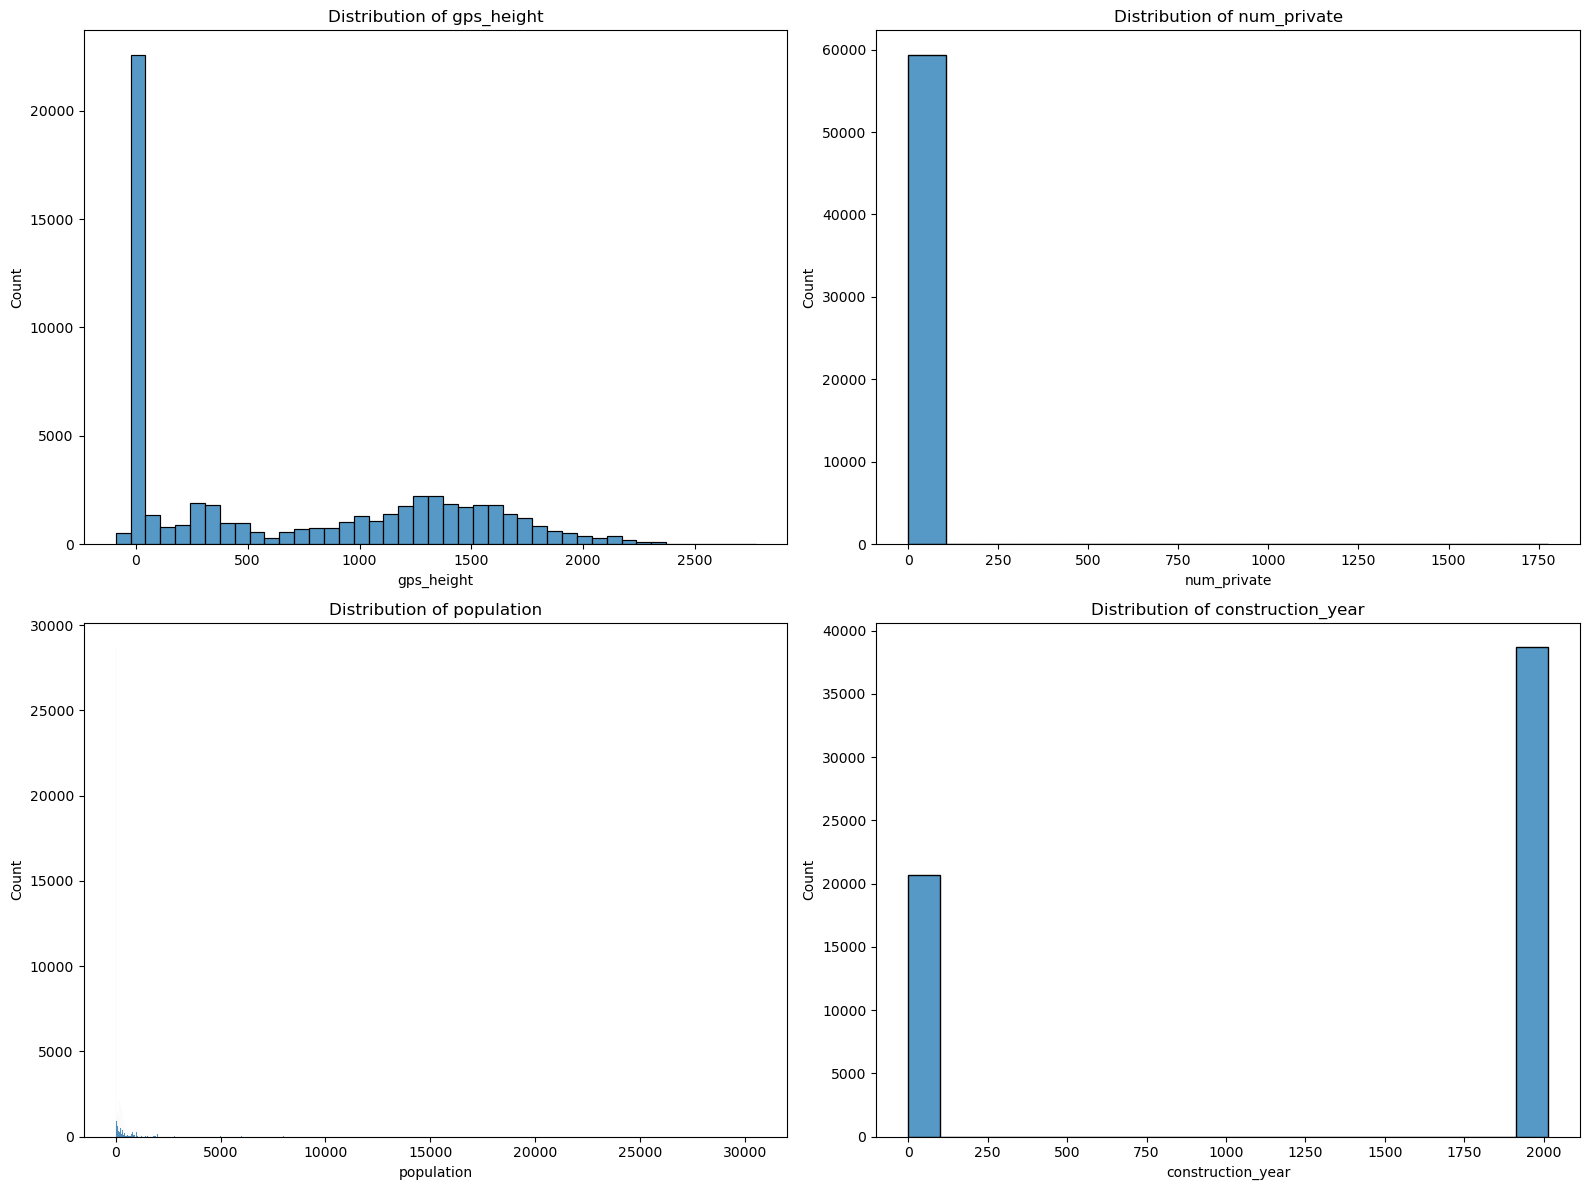

In [180]:
# VARIABLES CONTINUAS PRINCIPALES
# Create the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Plot the histograms on each subplot
sns.histplot(data=df, x='gps_height', ax=axs[0, 0])
sns.histplot(data=df, x='num_private', ax=axs[0, 1])
sns.histplot(data=df, x='population', ax=axs[1, 0])
sns.histplot(data=df, x='construction_year', ax=axs[1, 1])

# Set the title and axis labels for each subplot
axs[0, 0].set_title('Distribution of gps_height')
axs[0, 1].set_title('Distribution of num_private')
axs[1, 0].set_title('Distribution of population')
axs[1, 1].set_title('Distribution of construction_year')

axs[0, 0].set_xlabel('gps_height')
axs[0, 1].set_xlabel('num_private')
axs[1, 0].set_xlabel('population')
axs[1, 1].set_xlabel('construction_year')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

Del gráfico anterior observamos que:
- tanto la variable *gps_height* como *construction year* tienen muchos valores con 0, que quizás sean valores nulos, aunque algunos podrían ser correctos para *gps_height*.
- *num_private* tiene demasiados valores en 0 y no hay información del significado de la variable en la web de la competición por lo que seguramente será descartada.
- la variable *population* tiene outliers que no permiten visualizar correctamente, los mismos serán gestionados en el apartado de **Valores Atípicos**. 

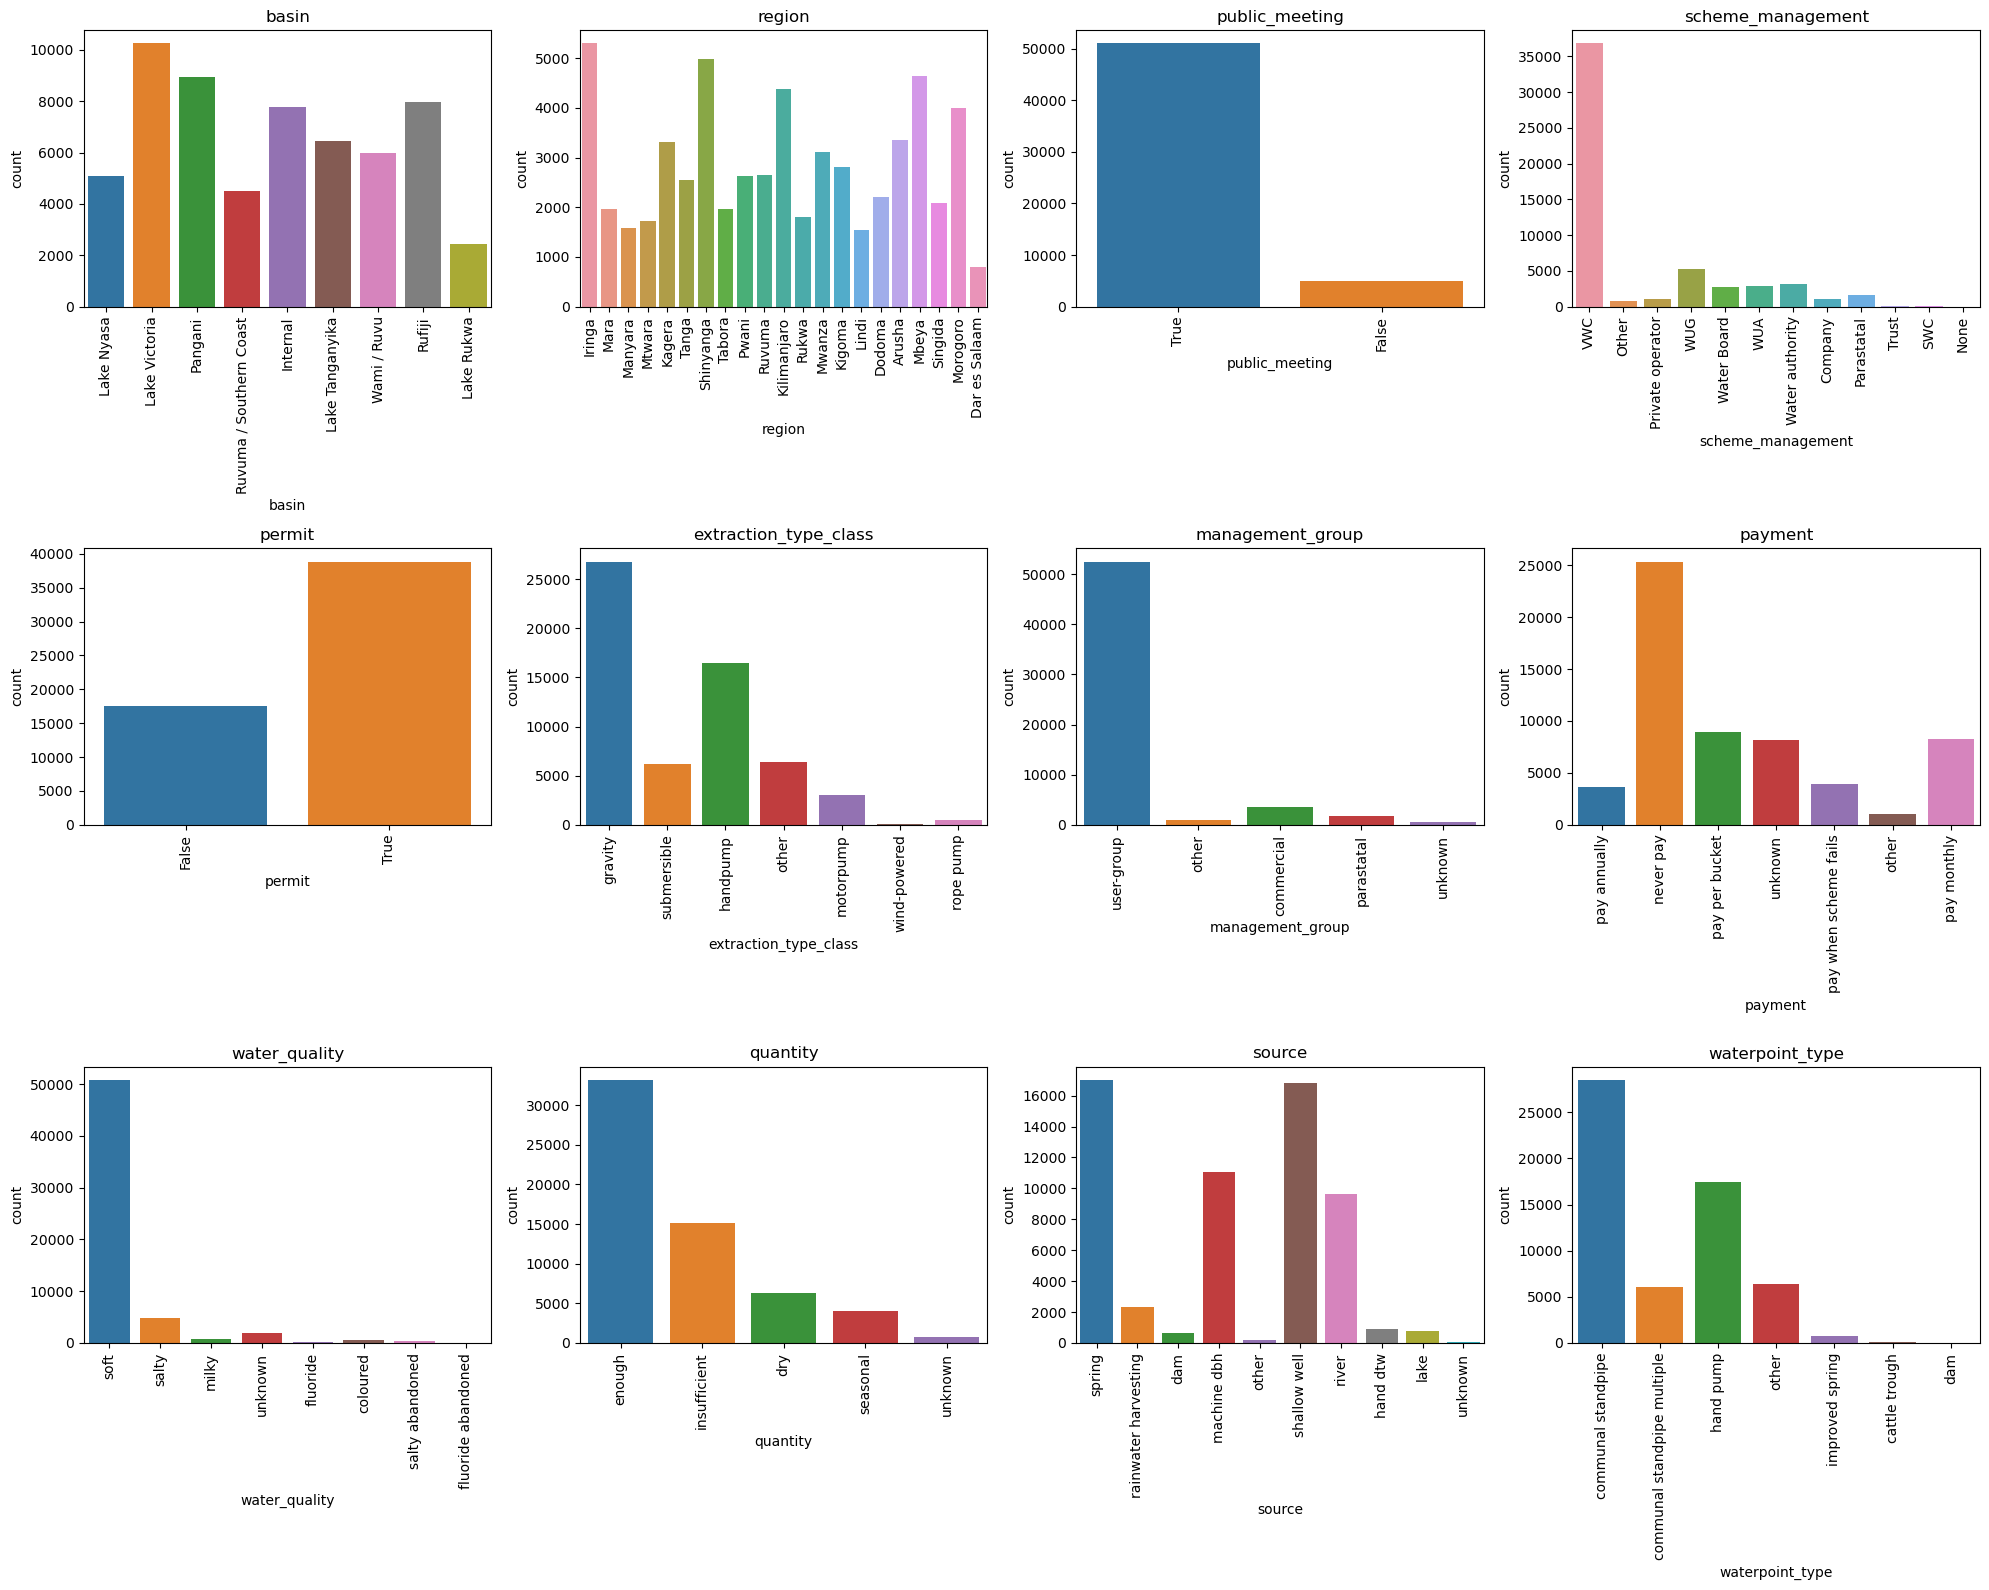

In [181]:
# VARIABLES CATEGORICAS
# Defino variables a graficar.
# Selección subjetiva en base a la posibilidad de pintar las distribuciones por el n° de categorías y similitud de las mismas
variables = ['basin','region','public_meeting','scheme_management','permit',
             'extraction_type_class','management_group','payment','water_quality',
             'quantity','source','waterpoint_type']

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))

# Loop over variables and create countplots
for var, ax in zip(variables, axes.flatten()):
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(var)
    ax.tick_params(axis='x', labelrotation=90)

# Adjust spacing and show plot
fig.tight_layout()
plt.show()

De los gráficos anteriores para las categóricas podemos ver algunas variables que seguro serán útiles en nuestro modelo predictivo y otras que tienen categorías casi uniformes que quizás sean transformadas o descartadas.

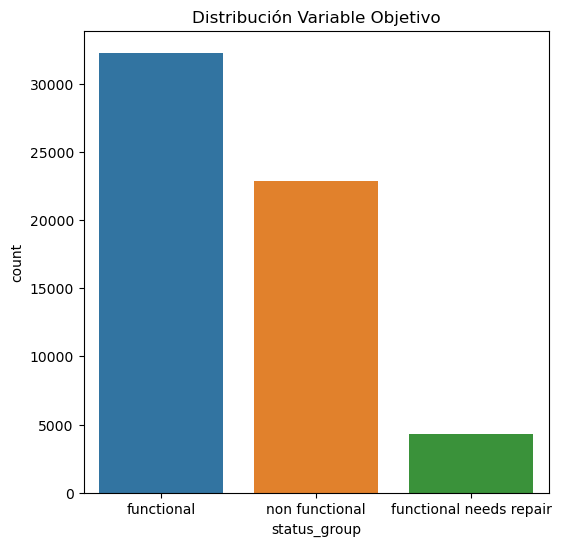

In [182]:
# Gráfico de la variable objetivo
fig, axs = plt.subplots(figsize=(6, 6))
g = sns.countplot(x='status_group',data=df)
axs.set_title('Distribución Variable Objetivo')
plt.show()

Vemos que la variable objetivo *status_group* se encuentra desbalanceada en la categoría *functional needs repair*, por lo que podrán considerarse técnicas de balanceo para dicha categoría. 

De lo observado en un primer vistazo para las variables numéricas podemos observar:
- existencia de variables que corresponden a datos geográficos (longitud y latitud), que hay variables de tipo código, por lo que podrían considerarse categóricas más que numéricas.
- variables con muchos valores que podrían ser nulos y se han rellenado con ceros, como *population* y *construction year*, que deberán gestionarse y quizás reemplazar con algún método de imputación.

De lo observado para las variables categóricas, se puede observar:
- La variable date_recorded debería convertirse a tipo datetime y crear variables de tiempo a partir de ella.
- Hay algunas variables con datos faltantes, que habrá de imputar para completarse o analizar si se eliminan en caso de que la perdida de información sea significativa.
- Encontramos conjuntos de variables que contienen información similar o duplicada y podría considerarse dejar solo una de cada una de ellas para evitar multicolinealidad.

## Transformaciones 🛠️
### Modificación de tipo de datos

De las variables del dataset nos encontramos con *date_recorded* que según la información de la competición registra la fecha en que fue ingresado el registro. Al tratarse de una fecha, cambiamos a tipo fecha en pandas. 

In [183]:
# Cambio de date_recorded a tipo date
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

Luego es convenientes modificar el tipo de dato de las variables *region_code* y *distric_code*, ya que más que números se tratan de códigos que hacen referencia a la ubicación, por lo que sería apropiado tratarlas como categorías.

In [184]:
# Cambio de tipo de dato de numérica a categórica
df['region_code'] = df['region_code'].astype('object')
df['district_code'] = df['region_code'].astype('object')

Al tratarse de una fecha, *date_recorded* provee información de cuando fue ingresado el registro en la base de datos. Podría tomarse las fechas y crear una nueva variable con la antiguedad en años y ver si tiene influencia en la predicción del estado de la bomba.

In [185]:
from datetime import datetime

# Propongo una fecha cualquiera posterior al último registro de la bomba
fecha = pd.to_datetime('2014-01-01')

# Creo la nueva variable antigüedad_reg
df['antiguedad_reg'] = df['date_recorded'].apply(lambda x: (fecha - x).days / 365.25)

# Elimino la variable anterior del dataset
df = df.drop(['date_recorded'],axis=1)
df.antiguedad_reg

0        2.803559
1        0.824093
2        0.848734
3        0.925394
4        2.472279
           ...   
59395    0.665298
59396    2.655715
59397    2.726899
59398    2.819986
59399    2.778919
Name: antiguedad_reg, Length: 59400, dtype: float64

## Valores Únicos y Diferentes

**Análisis de valores únicos o diferentes para cada variable, según lo que llamó la atención en la descripción.**

In [186]:
df.nunique()

id                       59400
amount_tsh                  98
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               27
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

In [187]:
df.duplicated().value_counts()

False    59400
dtype: int64

In [188]:
# Variable amount_tsh
print(df.amount_tsh.value_counts())

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64


Variable *amount_tsh* -> 70% de valores cero, descarto para analisis.

In [189]:
# Elimino la variable amount_tsh
df = df.drop('amount_tsh', axis=1)

In [190]:
# Variable gps_height
print(df.gps_height.value_counts())

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64


Variable *gps_height*, 34% de los valores 0. Podrían atribuirse a nulos o considerarse correctos. Para este modelo lo dejo sin modificaciones.

In [191]:
# Variable wpt_name
print(df.wpt_name.value_counts())

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64


En *wpt_name* observamos que hay demasiadas categorías, por lo que la variable tendrá muy poca capacidad predictiva. Por ello la descartaré para el modelo.

In [192]:
# Elimino la variable wpt_name
df = df.drop('wpt_name', axis=1)

In [193]:
# Variable num_private
print(df.num_private.value_counts())

0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: num_private, Length: 65, dtype: int64


Al tener casi un 99% de valores igual a cero, descartaré la variable *num_private*.

In [194]:
# Elimino la variable wpt_name
df = df.drop('num_private', axis=1)

In [195]:
# Variable subvillage
print(df.subvillage.value_counts())

# Categorías con frecuencia igual a 1
print((df.subvillage.value_counts()==1).sum())

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64
9424


La categoría subvillage tiene muchas categorías, y casi 10000 son categorías de frecuencia igual a 1, quizás en la etapa de feature engineering podrían agruparse estas cateogorías unitarias. Para los primeros modelos la dejaré sin modificaciones.

In [196]:
# Variable recorded_by
df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [197]:
# Elimino la variable que es totalmente uniforme
df = df.drop('recorded_by',axis=1)

In [198]:
# Analisis de los valores que toma la variable población
df.population.sort_values().value_counts()

0        21381
1         7025
200       1940
150       1892
250       1681
         ...  
166          1
895          1
887          1
886          1
30500        1
Name: population, Length: 1049, dtype: int64

Observamos que un 36% de los valores de la categoría *population* toman valores cero. Podemos considerar que quizás los datos son correctos y que no hay población en aquellas zonas donde se ubican las bombas de agua. Lo llamativo es que el valor 1 también tiene mucha frecuencia, en su mayoría toma valores bajos. Para empezar voy a comenzar comó está y luego quizá tratar la categoría 0 como valores perdidos e imputar esos valores.

In [199]:
# Analisis de los valores que toma la variable población
df.construction_year.value_counts().head()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64

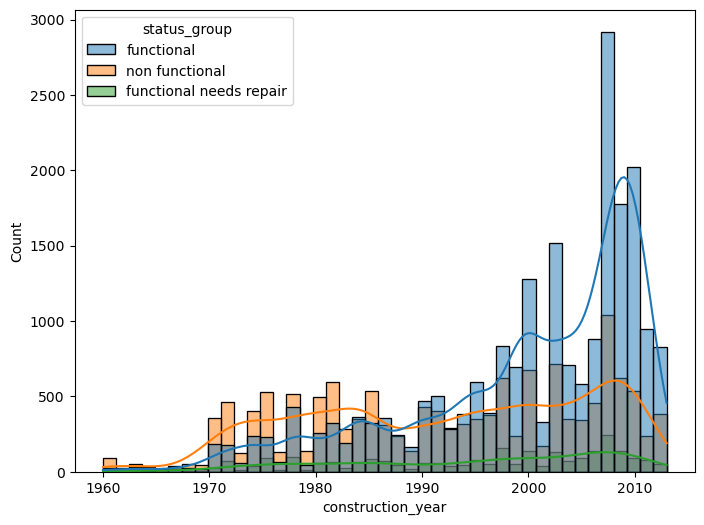

In [200]:
sns.histplot(data=df[df.construction_year!=0], x='construction_year', hue='status_group',kde=True)
plt.show()

En este caso los valores iguales a cero son claramente incorrectos y habrá que gestionarlos como valores perdidos. Sacando los valores cero podemos observar que construction_year será importante para nuestro análisis, al notarse que las bombas más antiguas que no funcionan superan a las que sí lo hacen, y aquellas bombas mas nuevas se encuentran en mejor funcionamiento.

## Valores nulos o *missings*

In [201]:
# Cantidad de valores nulos por variable
df.isna().sum()

id                           0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_c

In [202]:
# Porcentaje de valores nulos por variable
(df.select_dtypes(exclude=['number','datetime']).isnull().mean() * 100).round(2)

funder                    6.12
installer                 6.15
basin                     0.00
subvillage                0.62
region                    0.00
region_code               0.00
district_code             0.00
lga                       0.00
ward                      0.00
public_meeting            5.61
scheme_management         6.53
scheme_name              47.42
permit                    5.14
extraction_type           0.00
extraction_type_group     0.00
extraction_type_class     0.00
management                0.00
management_group          0.00
payment                   0.00
payment_type              0.00
water_quality             0.00
quality_group             0.00
quantity                  0.00
quantity_group            0.00
source                    0.00
source_type               0.00
source_class              0.00
waterpoint_type           0.00
waterpoint_type_group     0.00
status_group              0.00
dtype: float64

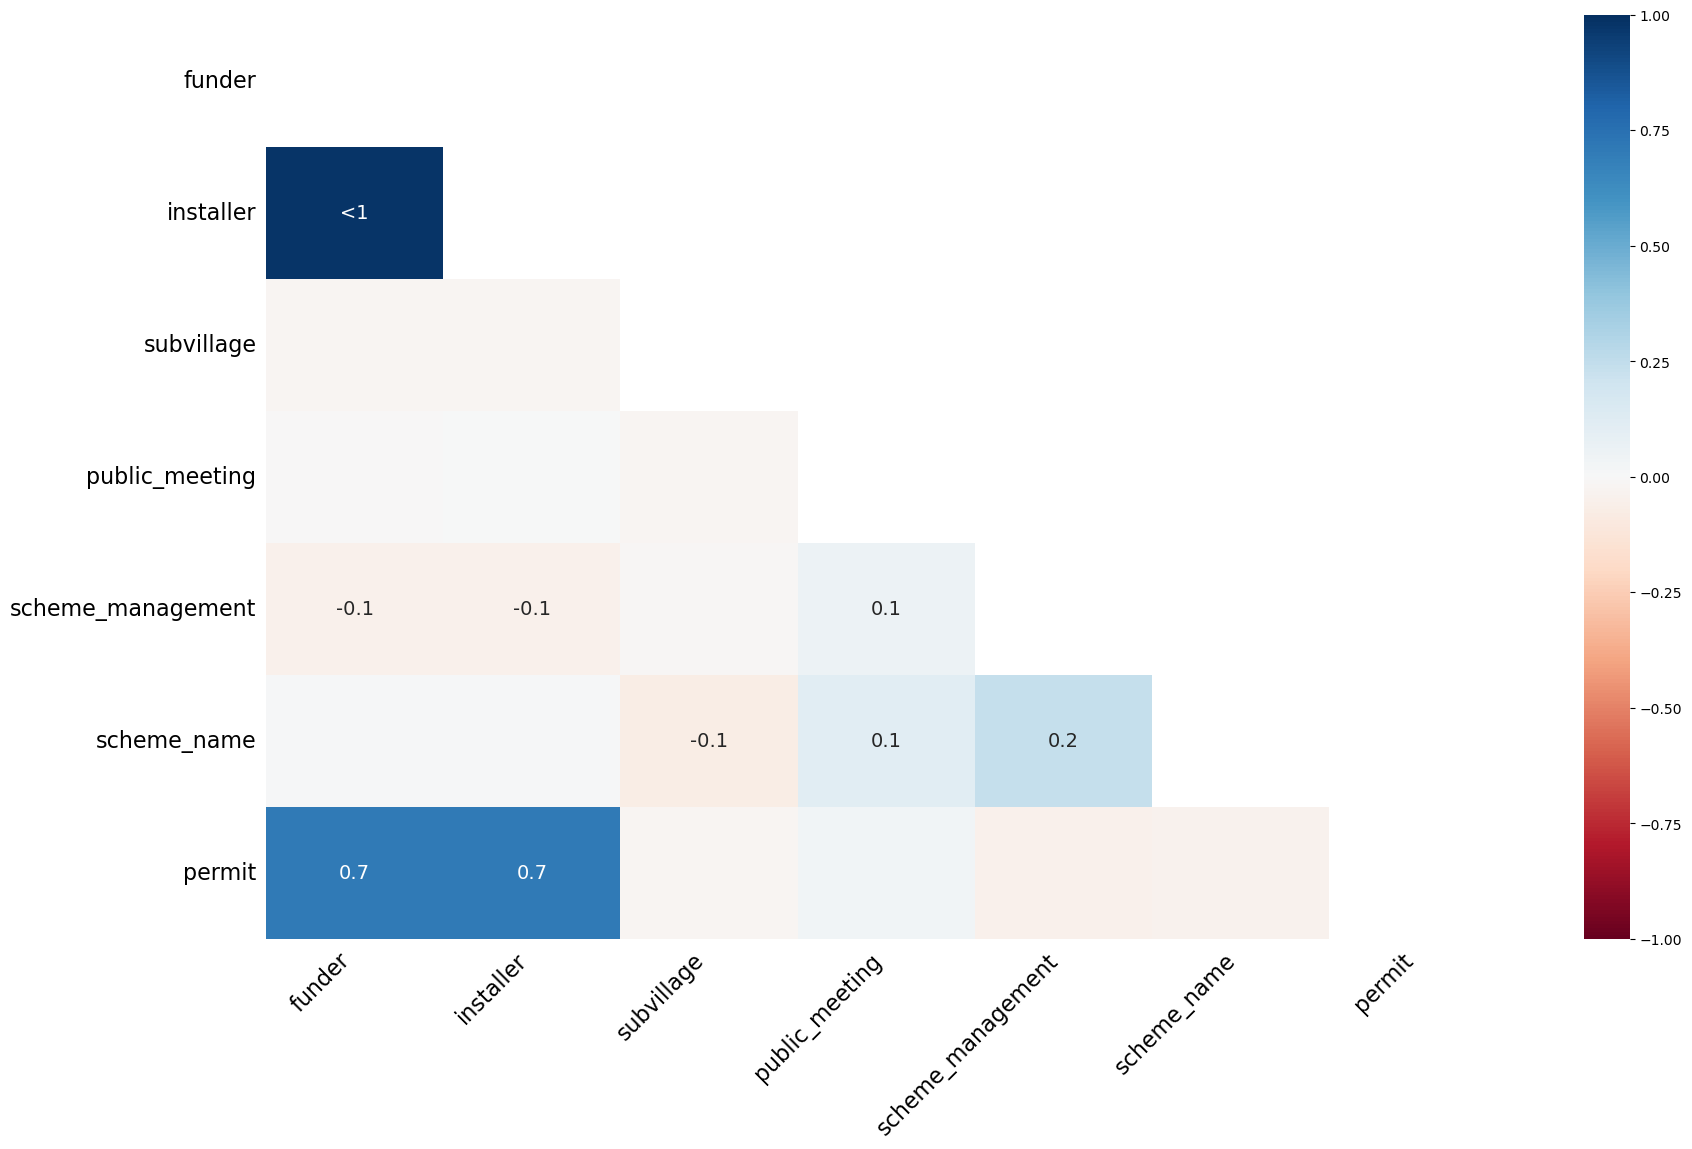

In [203]:
# Heatmap de valores perdidos 
msno.heatmap(df)
plt.show()

Como primera estrategia, procedo a imputar las variables categóricas con la moda, menos la variable scheme_name que tiene un porcentaje de valores missings muy importante:

In [204]:
# Defino las variables que he observado que presentan valores missings
na_cols = ['funder','installer','subvillage','public_meeting','scheme_management','permit']

# Imputación de valores faltantes con la categoría modal de cada variable
for var in na_cols:
    df[var] = df[var].fillna(df[var].mode().iloc[0])

Elimino la columna *scheme_name* ya que sería problemática al incluirla por ese 47% de valores missings y con demasiadas categorías para los pocos datos existentes, lo que dificulta la imputación para mantener los datos.

In [205]:
# Elimino la variable scheme_name por una alta cantidad de valores perdidos
df = df.drop('scheme_name', axis=1)

In [206]:
(df.construction_year==0).value_counts()

False    38691
True     20709
Name: construction_year, dtype: int64

Para el caso de *construction_year*, a los valores ceros que en este caso se interpretan como valores nulos decido imputar por la mediana:

In [207]:
# Calculo de la mediana de la variable
year_median = int(df.construction_year[df.construction_year!=0].median())
print(year_median)

2000


In [208]:
# Reemplazo / Imputo los valores cero con la media
df['construction_year'] = df['construction_year'].replace(0, year_median)

In [209]:
df.construction_year.value_counts()

2000    22800
2010     2645
2008     2613
2009     2533
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1996      811
1980      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

## Colinealidad entre predictores

**Correlación variables numéricas**

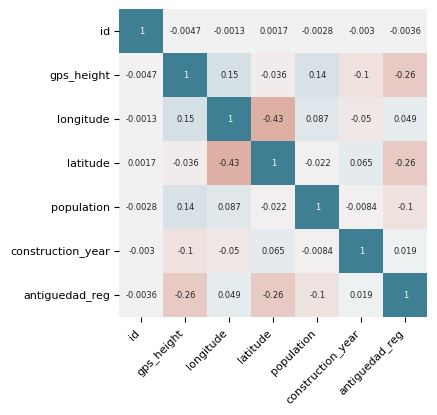

In [210]:
corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Observamos que hay una correlación entre el año en construcción y la altura gps, pero no a niveles que considere elevados para descartar alguna de ellas.

Elimino variables cartográficos que no serán de utilidad para nuestro modelo:

In [211]:
# Elimino variables cartográficas
df = df.drop(['longitude','latitude'],axis=1)

**Asociación variables categóricas**

In [212]:
# Defino cuales son las variables categoricas
cat_cols = df.select_dtypes(include='object').drop('status_group',axis=1)

In [213]:
# Función para calcular VCramer (dos nominales de entrada!)
def cramers_v(var1, varObj):
    
    if not var1.dtypes == 'object':
        bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'object':
        bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)
        
    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer


# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(cat_cols.apply(lambda x: cramers_v(x,df.status_group)),columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente a la target').update_yaxes(categoryorder="total ascending")


In [214]:
# Importancia relativa de las variables frente a la variable objetivo
tablaCramer.VCramer.sort_values(ascending=False)

subvillage               0.681580
ward                     0.469122
installer                0.351873
funder                   0.340828
lga                      0.311533
quantity_group           0.309240
quantity                 0.309240
waterpoint_type          0.250426
extraction_type          0.248999
extraction_type_group    0.247306
extraction_type_class    0.241544
waterpoint_type_group    0.226873
district_code            0.208356
region_code              0.208356
region                   0.200895
payment_type             0.182704
payment                  0.182704
source                   0.148619
water_quality            0.138455
quality_group            0.132958
management               0.132355
scheme_management        0.128754
basin                    0.127163
source_type              0.126691
source_class             0.070488
management_group         0.049207
Name: VCramer, dtype: float64

In [215]:
cat_cols.head()

funder     installer                    basin  subvillage   region  \
0         Roman         Roman               Lake Nyasa    Mnyusi B   Iringa   
1       Grumeti       GRUMETI            Lake Victoria     Nyamara     Mara   
2  Lottery Club  World vision                  Pangani     Majengo  Manyara   
3        Unicef        UNICEF  Ruvuma / Southern Coast  Mahakamani   Mtwara   
4   Action In A       Artisan            Lake Victoria  Kyanyamisa   Kagera   

  region_code district_code        lga        ward scheme_management  \
0          11            11     Ludewa    Mundindi               VWC   
1          20            20  Serengeti       Natta             Other   
2          21            21  Simanjiro     Ngorika               VWC   
3          90            90   Nanyumbu    Nanyumbu               VWC   
4          18            18    Karagwe  Nyakasimbi               VWC   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal standpipe  
3  groundwater  communal standpipe multiple    communal standpipe  
4      surface           communal standpipe    communal standpipe

**Heatmap de V de Cramer para analizar asociación entre variables categóricas**

In [218]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [219]:
cols = ['subvillage','basin','ward','lga','source','waterpoint_type','quantity','water_quality','payment','management','extraction_type','permit','scheme_management','public_meeting']
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

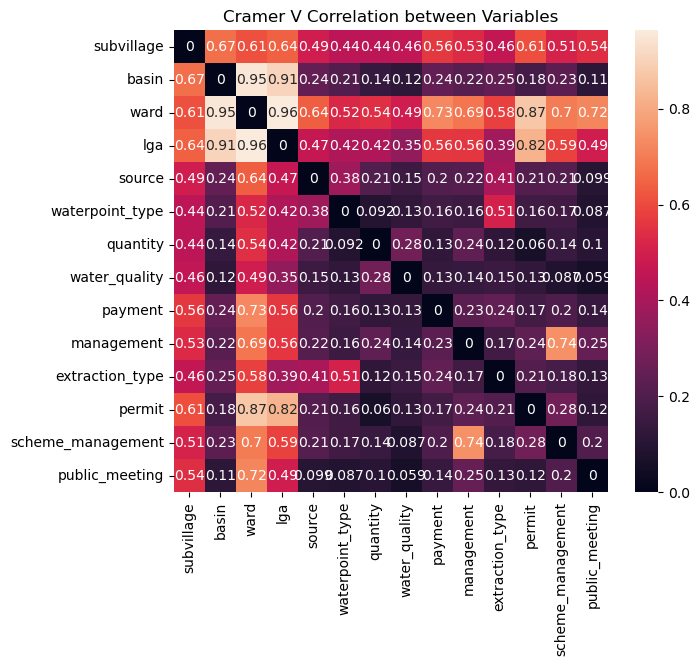

In [220]:
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

Conjuntos de variables altamente asociadas:
1. source, source_type y source_class -> por la tabla de VCramer nos quedaremos por ahora con source
2. waterpoint_type y waterpoint_type_group -> misma razon que antes, nos quedamos con waterpoint_type_group
3. quantity y quantity_group -> son casi iguales, es indistinto, nos quedamos con quantity
4. water_quality y quality_group -> mismo caso, nos quedamos con quality_group
5. payment y payment_type -> nos quedamos con payment
6. management y management_group -> management
7. extraction_type, extraction_type_group y extraction_type_class -> extraction_type
8. region, region_code y district_code -> nos quedamos con district_code
9. basin, ward y lga -> ward    

In [221]:
# Elimino predictores con asociación entre ellos que generarían problemas de multicolinealidad 
df = df.drop(['source_type','source_class','waterpoint_type_group','quantity_group','payment_type','water_quality','management_group','extraction_type_group','extraction_type_class','region','region_code','lga','basin'],axis=1)

In [222]:
df.head()

id        funder  gps_height     installer  subvillage district_code  \
0  69572         Roman        1390         Roman    Mnyusi B            11   
1   8776       Grumeti        1399       GRUMETI     Nyamara            20   
2  34310  Lottery Club         686  World vision     Majengo            21   
3  67743        Unicef         263        UNICEF  Mahakamani            90   
4  19728   Action In A           0       Artisan  Kyanyamisa            18   

         ward  population  public_meeting scheme_management  permit  \
0    Mundindi         109            True               VWC   False   
1       Natta         280            True             Other    True   
2     Ngorika         250            True               VWC    True   
3    Nanyumbu          58            True               VWC    True   
4  Nyakasimbi           0            True               VWC    True   

   construction_year extraction_type management         payment quality_group  \
0               1999         gravity        vwc    pay annually          good   
1               2010         gravity        wug       never pay          good   
2               2009         gravity        vwc  pay per bucket          good   
3               1986     submersible        vwc       never pay          good   
4               2000         gravity      other       never pay          good   

       quantity                source              waterpoint_type  \
0        enough                spring           communal standpipe   
1  insufficient  rainwater harvesting           communal standpipe   
2        enough                   dam  communal standpipe multiple   
3           dry           machine dbh  communal standpipe multiple   
4      seasonal  rainwater harvesting           communal standpipe   

     status_group  antiguedad_reg  
0      functional        2.803559  
1      functional        0.824093  
2      functional        0.848734  
3  non functional        0.925394  
4      functional        2.472279

In [223]:
# Establezco el id como index del DataFrame
df = df.set_index('id')
df.head()

funder  gps_height     installer  subvillage district_code  \
id                                                                        
69572         Roman        1390         Roman    Mnyusi B            11   
8776        Grumeti        1399       GRUMETI     Nyamara            20   
34310  Lottery Club         686  World vision     Majengo            21   
67743        Unicef         263        UNICEF  Mahakamani            90   
19728   Action In A           0       Artisan  Kyanyamisa            18   

             ward  population  public_meeting scheme_management  permit  \
id                                                                        
69572    Mundindi         109            True               VWC   False   
8776        Natta         280            True             Other    True   
34310     Ngorika         250            True               VWC    True   
67743    Nanyumbu          58            True               VWC    True   
19728  Nyakasimbi           0            True               VWC    True   

       construction_year extraction_type management         payment  \
id                                                                    
69572               1999         gravity        vwc    pay annually   
8776                2010         gravity        wug       never pay   
34310               2009         gravity        vwc  pay per bucket   
67743               1986     submersible        vwc       never pay   
19728               2000         gravity      other       never pay   

      quality_group      quantity                source  \
id                                                        
69572          good        enough                spring   
8776           good  insufficient  rainwater harvesting   
34310          good        enough                   dam   
67743          good           dry           machine dbh   
19728          good      seasonal  rainwater harvesting   

                   waterpoint_type    status_group  antiguedad_reg  
id                                                                  
69572           communal standpipe      functional        2.803559  
8776            communal standpipe      functional        0.824093  
34310  communal standpipe multiple      functional        0.848734  
67743  communal standpipe multiple  non functional        0.925394  
19728           communal standpipe      functional        2.472279

## Valores Atípicos

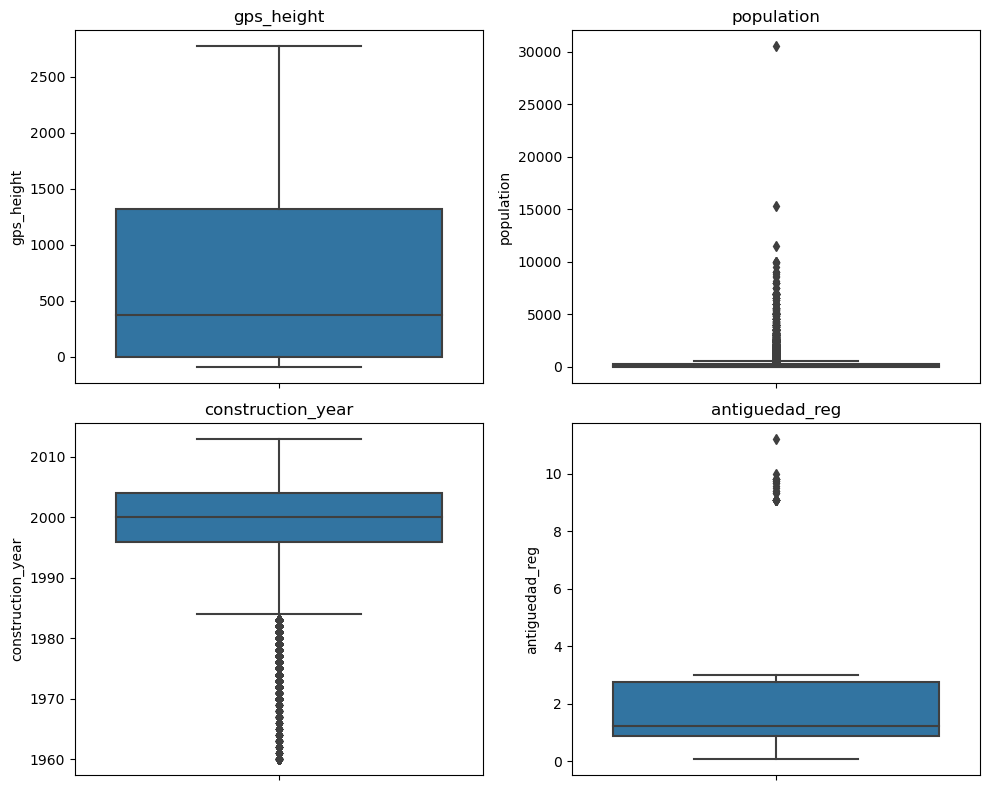

In [224]:
# Create a figure with four subplots arranged in 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Loop through each numerical column in the dataframe
for i, col in enumerate(df.select_dtypes(include=['int','float']).columns):
    
    # Select the appropriate subplot based on the loop index i
    ax = axes[i//2, i%2]
    
    # Plot a boxplot on the selected subplot using seaborn
    sns.boxplot(ax=ax, data=df, y=col)
    
    # Set the title for the subplot
    ax.set_title(col)
    
# Adjust the spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

De los boxplots para las variables numéricas que quedaron podemos ver:
- *gps_height* no tiene outliers, aunque si tiene muchos valores igual a cero, por lo que quizas tramifique la variable.

- Luego *population* si tiene un outlier muy marcado que puede ser veridico pero que quizás altera mucho nuestro modelo, quizás pueda eliminar ese registro para obtener mejores predicciones.

- En construction year se generaron outliers a partir de completar los datos faltantes con la mediana (2000) por eso los primeros años quedaron como atípicos pero son correctos.

- Y en antiguedad de la fecha de registro vemos que hay algunos outliers que podrán gestionarse luego.

## Escalado y normalización

Acá podría probar con varias opciones, desde hacer LabelEncoder con solo las variables que tengan muchas categorías y hacer dummies con el resto. También podría probarse si usando algunos tipos distintos de escalado son más apropiados que otros.

Creación de dummies para variables con menos de 10 categorías:

In [225]:
# iterate over each column in the dataframe
for col in df.drop('status_group',axis=1).columns:

    # check if the column is categorical and has less than 10 unique values
    if df[col].dtype == 'object' and len(df[col].unique()) < 10:
    
    # create dummy variables for the column and add them to the dataframe
        dummy_df = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummy_df], axis=1)
        # drop the original column from the dataframe
        df = df.drop(col, axis=1)

In [226]:
df.head()

funder  gps_height     installer  subvillage district_code  \
id                                                                        
69572         Roman        1390         Roman    Mnyusi B            11   
8776        Grumeti        1399       GRUMETI     Nyamara            20   
34310  Lottery Club         686  World vision     Majengo            21   
67743        Unicef         263        UNICEF  Mahakamani            90   
19728   Action In A           0       Artisan  Kyanyamisa            18   

             ward  population  public_meeting scheme_management  permit  \
id                                                                        
69572    Mundindi         109            True               VWC   False   
8776        Natta         280            True             Other    True   
34310     Ngorika         250            True               VWC    True   
67743    Nanyumbu          58            True               VWC    True   
19728  Nyakasimbi           0            True               VWC    True   

       construction_year extraction_type management                source  \
id                                                                          
69572               1999         gravity        vwc                spring   
8776                2010         gravity        wug  rainwater harvesting   
34310               2009         gravity        vwc                   dam   
67743               1986     submersible        vwc           machine dbh   
19728               2000         gravity      other  rainwater harvesting   

         status_group  antiguedad_reg  payment_never pay  payment_other  \
id                                                                        
69572      functional        2.803559                  0              0   
8776       functional        0.824093                  1              0   
34310      functional        0.848734                  0              0   
67743  non functional        0.925394                  1              0   
19728      functional        2.472279                  1              0   

       payment_pay annually  payment_pay monthly  payment_pay per bucket  \
id                                                                         
69572                     1                    0                       0   
8776                      0                    0                       0   
34310                     0                    0                       1   
67743                     0                    0                       0   
19728                     0                    0                       0   

       payment_pay when scheme fails  payment_unknown  quality_group_colored  \
id                                                                             
69572                              0                0                      0   
8776                               0                0                      0   
34310                              0                0                      0   
67743                              0                0                      0   
19728                              0                0                      0   

       quality_group_fluoride  quality_group_good  quality_group_milky  \
id                                                                       
69572                       0                   1                    0   
8776                        0                   1                    0   
34310                       0                   1                    0   
67743                       0                   1                    0   
19728                       0                   1                    0   

       quality_group_salty  quality_group_unknown  quantity_dry  \
id                                                                
69572                    0                      0             0   
8776                     0                      0             0   
34310         

In [227]:
print(df['public_meeting'].dtype)
print(df['permit'].dtype)

bool
bool


Para las binarias convierto en 0 y 1:

In [228]:
binary = ['public_meeting','permit']
for col in binary:
    df[col] = df[col].astype(int)

In [229]:
df.head()

funder  gps_height     installer  subvillage district_code  \
id                                                                        
69572         Roman        1390         Roman    Mnyusi B            11   
8776        Grumeti        1399       GRUMETI     Nyamara            20   
34310  Lottery Club         686  World vision     Majengo            21   
67743        Unicef         263        UNICEF  Mahakamani            90   
19728   Action In A           0       Artisan  Kyanyamisa            18   

             ward  population  public_meeting scheme_management  permit  \
id                                                                        
69572    Mundindi         109               1               VWC       0   
8776        Natta         280               1             Other       1   
34310     Ngorika         250               1               VWC       1   
67743    Nanyumbu          58               1               VWC       1   
19728  Nyakasimbi           0               1               VWC       1   

       construction_year extraction_type management                source  \
id                                                                          
69572               1999         gravity        vwc                spring   
8776                2010         gravity        wug  rainwater harvesting   
34310               2009         gravity        vwc                   dam   
67743               1986     submersible        vwc           machine dbh   
19728               2000         gravity      other  rainwater harvesting   

         status_group  antiguedad_reg  payment_never pay  payment_other  \
id                                                                        
69572      functional        2.803559                  0              0   
8776       functional        0.824093                  1              0   
34310      functional        0.848734                  0              0   
67743  non functional        0.925394                  1              0   
19728      functional        2.472279                  1              0   

       payment_pay annually  payment_pay monthly  payment_pay per bucket  \
id                                                                         
69572                     1                    0                       0   
8776                      0                    0                       0   
34310                     0                    0                       1   
67743                     0                    0                       0   
19728                     0                    0                       0   

       payment_pay when scheme fails  payment_unknown  quality_group_colored  \
id                                                                             
69572                              0                0                      0   
8776                               0                0                      0   
34310                              0                0                      0   
67743                              0                0                      0   
19728                              0                0                      0   

       quality_group_fluoride  quality_group_good  quality_group_milky  \
id                                                                       
69572                       0                   1                    0   
8776                        0                   1                    0   
34310                       0                   1                    0   
67743                       0                   1                    0   
19728                       0                   1                    0   

       quality_group_salty  quality_group_unknown  quantity_dry  \
id                                                                
69572                    0                      0             0   
8776                     0                      0             0   
34310         

Utilizo LabelEncoder para el resto:

In [230]:
# Instancio el encoder
le = LabelEncoder()

# Selecciono variables que todavía están como categóricas
cat_vars = df.select_dtypes(include='object')

# Trabajo sobre una copia del df por si quiero modificar alguna de las variables luego
df_encoded = df.copy()
for var in cat_vars:
    df_encoded[var] = le.fit_transform(df_encoded[var])

In [231]:
df_encoded.head()

funder  gps_height  installer  subvillage  district_code  ward  \
id                                                                      
69572    1369        1390       1518       11807             10  1426   
8776      469        1399        545       15838             19  1576   
34310     825         686       2048        9074             20  1624   
67743    1741         263       1852        8982             25  1571   
19728      20           0        119        7698             17  1687   

       population  public_meeting  scheme_management  permit  \
id                                                             
69572         109               1                  7       0   
8776          280               1                  2       1   
34310         250               1                  7       1   
67743          58               1                  7       1   
19728           0               1                  7       1   

       construction_year  extraction_type  management  source  status_group  \
id                                                                            
69572               1999                3           7       8             0   
8776                2010                3          11       5             0   
34310               2009                3           7       0             0   
67743               1986               14           7       3             2   
19728               2000                3           1       5             0   

       antiguedad_reg  payment_never pay  payment_other  payment_pay annually  \
id                                                                              
69572        2.803559                  0              0                     1   
8776         0.824093                  1              0                     0   
34310        0.848734                  0              0                     0   
67743        0.925394                  1              0                     0   
19728        2.472279                  1              0                     0   

       payment_pay monthly  payment_pay per bucket  \
id                                                   
69572                    0                       0   
8776                     0                       0   
34310                    0                       1   
67743                    0                       0   
19728                    0                       0   

       payment_pay when scheme fails  payment_unknown  quality_group_colored  \
id                                                                             
69572                              0                0                      0   
8776                               0                0                      0   
34310                              0                0                      0   
67743                              0                0                      0   
19728                              0                0                      0   

       quality_group_fluoride  quality_group_good  quality_group_milky  \
id                                                                       
69572                       0                   1                    0   
8776                        0                   1                    0   
34310                       0                   1                    0   
67743                       0                   1                    0   
19728                       0                   1                    0   

       quality_group_salty  quality_group_unknown  quantity_dry  \
id                                                                
69572                    0                      0             0   
8776                     0                      0             0   
34310                    0                      0             0   
67743                    0                      0             1   
19728                    0                      0             0

Referencia status_group:
- 0: functional
- 1: functional needs repair
- 2: non functional

In [232]:
# Matriz de correlaciones del df preprocesado
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Apply a color gradient to the table cells
corr_table = corr_matrix.style.background_gradient(cmap="coolwarm")

# Display the table
corr_table

### Partición training-test en los datos de entrenamiento para evaluar mejores modelos a priori.

In [233]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Separate the features and target variables
X_train = train_df.drop('status_group', axis=1)
y_train = train_df['status_group']
X_test = test_df.drop('status_group', axis=1)
y_test = test_df['status_group']

In [234]:
# Reviso que el muestreo haya quedado con los tamaños correctos de train y test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(47520, 40)
(47520,)
(11880, 40)
(11880,)


# Modelado 💡
## Selección de primeros modelos

In [235]:
# MODELO 1: Regresión Logística
# ------------------------------------------------- #
# Instanciar el modelo
logreg = LogisticRegression(random_state=42, multi_class='multinomial')

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Predecir para los datos de prueba
y_pred1 = logreg.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.5563973063973064


In [236]:
# Create classification report
class_rep_log_reg = classification_report(y_test, y_pred1)

# Report
print("\nClassification report:\n", class_rep_log_reg)


Classification report:
               precision    recall  f1-score   support

           0       0.57      0.87      0.69      6457
           1       0.00      0.00      0.00       851
           2       0.51      0.22      0.31      4572

    accuracy                           0.56     11880
   macro avg       0.36      0.36      0.33     11880
weighted avg       0.50      0.56      0.49     11880



A priori observamos que la regresión logística no parece ser el mejor modelo para nuestra clasificación, por lo que veremos como se comportan los datos con los demás modelos de clasificación supervisada.

In [237]:
# MODELO 2: Naive Bayes
# ------------------------------------------------- #
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred2 = nb.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.6981481481481482


In [238]:
# Create classification report
class_rep_nb = classification_report(y_test, y_pred2)

# Report
print("\nClassification report:\n", class_rep_nb)


Classification report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77      6457
           1       0.23      0.13      0.17       851
           2       0.78      0.55      0.65      4572

    accuracy                           0.70     11880
   macro avg       0.57      0.52      0.53     11880
weighted avg       0.69      0.70      0.68     11880



In [239]:
# MODELO 3: Random Forest
# ------------------------------------------------- #
rfc = RandomForestClassifier(n_estimators=150, random_state=42)

rfc.fit(X_train, y_train)

y_pred3 = rfc.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.8006734006734006


In [240]:
# Create classification report
class_rep_rf = classification_report(y_test, y_pred3)

# Report
print("\nClassification report:\n", class_rep_rf)


Classification report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84      6457
           1       0.53      0.34      0.42       851
           2       0.83      0.77      0.80      4572

    accuracy                           0.80     11880
   macro avg       0.72      0.67      0.69     11880
weighted avg       0.79      0.80      0.79     11880



In [241]:
# MODELO 4: K-Nearest Neighbors (KNN)
# ------------------------------------------------- #
# create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the test data
y_pred4 = knn.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.6332491582491583


In [242]:
# Create classification report
class_rep_knn = classification_report(y_test, y_pred4)

# Report
print("\nClassification report:\n", class_rep_knn)


Classification report:
               precision    recall  f1-score   support

           0       0.65      0.86      0.74      6457
           1       0.26      0.22      0.24       851
           2       0.70      0.40      0.51      4572

    accuracy                           0.63     11880
   macro avg       0.53      0.49      0.49     11880
weighted avg       0.64      0.63      0.61     11880



In [243]:
# MODELO 5: Gradient Boosting Classifier from sklearn
# ------------------------------------------------- #
# Define the Gradient Boosting Classifier model and fit it to the training data
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred5 = gb_clf.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred5)

# Print accuracy score
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.7504208754208754


In [244]:
# Create classification report
class_rep_gb = classification_report(y_test, y_pred5)

# Report
print("\nClassification report:\n", class_rep_gb)


Classification report:
               precision    recall  f1-score   support

           0       0.72      0.93      0.81      6457
           1       0.61      0.08      0.14       851
           2       0.84      0.62      0.71      4572

    accuracy                           0.75     11880
   macro avg       0.72      0.54      0.55     11880
weighted avg       0.76      0.75      0.72     11880



In [245]:
# MODELO 6: XGBoost
# ------------------------------------------------- #
xgb_model = xgb.XGBClassifier()

# Train model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred6 = xgb_model.predict(X_test)

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred6)

# Print accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.7974747474747474


In [246]:
# Create classification report
class_rep_xgb = classification_report(y_test, y_pred6)

# Report
print("\nClassification report:\n", class_rep_xgb)


Classification report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84      6457
           1       0.65      0.24      0.35       851
           2       0.85      0.73      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.76      0.63      0.66     11880
weighted avg       0.80      0.80      0.78     11880



## Feature Engineering 🔧

Una vez observado como se comporta el modelo con el preprocesado se decide probar con otras técnicas como la tramificación de variables para ver qué resultados se obtienen. 

### Tramificación de variables

In [247]:
# Agrupo las categorias de la variable funder que solo tienen una frecuencia en una categoría unica llamada "otros"
# Get the value counts of each category
value_counts = df['funder'].value_counts()

# Identify categories with count of 1
categories_to_group = value_counts[value_counts == 1].index.tolist()

# Replace categories with count of 1 with a new category name
df['funder'] = df['funder'].replace(categories_to_group, 'otros')

df.funder.value_counts()

Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                          ...  
Wua And Ded                   2
Ardhi Instute                 2
Roman Cathoric                2
Tempo                         2
The Islamic                   2
Name: funder, Length: 924, dtype: int64

In [248]:
# Agrupo las categorias de la variable installer que solo tienen una frecuencia en una categoría unica llamada "otros"
# Get the value counts of each category
value_counts = df['installer'].value_counts()

# Identify categories with count of 1
categories_to_group = value_counts[value_counts == 1].index.tolist()

# Replace categories with count of 1 with a new category name
df['installer'] = df['installer'].replace(categories_to_group, 'otros')

df.installer.value_counts()

DWE                       21057
Government                 1825
RWE                        1206
otros                      1098
Commu                      1060
                          ...  
LIUWASSA                      2
Judge Mchome                  2
UNIVERSAL CONSTRUCTION        2
HDV                           2
Kkkt                          2
Name: installer, Length: 1048, dtype: int64

In [249]:
# Agrupo las categorias de la variable subvillage que solo tienen una frecuencia en una categoría unica llamada "otros"
# Get the value counts of each category
value_counts = df['subvillage'].value_counts()

# Identify categories with count of less than 11
categories_to_group = value_counts[value_counts < 11].index.tolist()

# Replace categories with count of less than 11 with a new category name
df['subvillage'] = df['subvillage'].replace(categories_to_group, 'otros')

df.subvillage.value_counts()

otros           41991
Madukani          879
Shuleni           506
Majengo           502
Kati              373
                ...  
Iringa             11
Kakoma             11
Makao              11
Mbwawa Shule       11
Nyamikoma          11
Name: subvillage, Length: 608, dtype: int64

In [250]:
# Hacer label encoding con variables tramificadas
cat_vars = df.select_dtypes(include='object')
for var in cat_vars:
    df_encoded[var] = le.fit_transform(df_encoded[var])

## Tuneo de Hiperparámetros

Me quedo con los modelos que dieron mejores resultado dieron en la prueba con el muestro de los datos de train, especificamente con el clasificador Random Forest y el XGBoost. Primero realizo el tuneo de hiperparámetros del Random Forest:

In [79]:
grid_param = {
    'n_estimators': [100,300,500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [16,20,22,24],
    'max_features': ['auto', 'sqrt'],

}

In [80]:
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [81]:
model_grid = GridSearchCV(estimator=rfc,
                     param_grid=grid_param,
                     cv=stratified_kfold,
                     n_jobs=-1)

In [82]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 20, 22, 24],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300, 500]})

In [83]:
print(model_grid.best_params_)
print(model_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 300}
0.8069444444444445


In [84]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      6457
           1       0.63      0.25      0.36       851
           2       0.84      0.74      0.79      4572

    accuracy                           0.80     11880
   macro avg       0.75      0.64      0.66     11880
weighted avg       0.79      0.80      0.79     11880



In [84]:
# PRUEBA MODELO RANDOM FOREST CON MEJORES HIPERPARAMETROS
rfc = RandomForestClassifier(n_estimators=300, random_state=42, criterion='entropy', max_depth=20, max_features='auto')

rfc.fit(X_train, y_train)

y_pred3 = rfc.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.8084175084175084


In [85]:
# Create classification report
class_rep_rf = classification_report(y_test, y_pred3)

# Report
print("\nClassification report:\n", class_rep_rf)


Classification report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      6457
           1       0.62      0.29      0.39       851
           2       0.86      0.75      0.80      4572

    accuracy                           0.81     11880
   macro avg       0.76      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



#### Tuneo de hiperparámetros del xgboost:

In [87]:
param_grid2 = {
    "learning_rate": [0.01, 0.1, 0.5],
    "max_depth": [3, 5, 7],
    "n_estimators": [50, 100, 150],
}

In [88]:
grid_search = GridSearchCV(xgb_model, param_grid2, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [89]:
# Print best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 150}
Best score: 0.7977272727272727


In [86]:
# MODELO: XGBoost con mejores hiperparametros
# ------------------------------------------------- #
xgb_model = xgb.XGBClassifier(learning_rate=0.5, max_depth=7, n_estimators=150)

xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred6 = xgb_model.predict(X_test)

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred6)

# Print accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8041245791245791


In [87]:
# Create classification report
class_rep_xgb = classification_report(y_test, y_pred6)

# Report
print("\nClassification report:\n", class_rep_xgb)


Classification report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85      6457
           1       0.55      0.32      0.41       851
           2       0.84      0.77      0.80      4572

    accuracy                           0.80     11880
   macro avg       0.73      0.66      0.68     11880
weighted avg       0.80      0.80      0.80     11880



Se podría como siguiente estrategia:
- agrupar categorias desbalanceadas
- eliminar variables como subvillage
- ver colinealidades entre las variables que quedaron

## Imbalanced Dataset - Balanceo de datos ⚖️

Referencia: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb

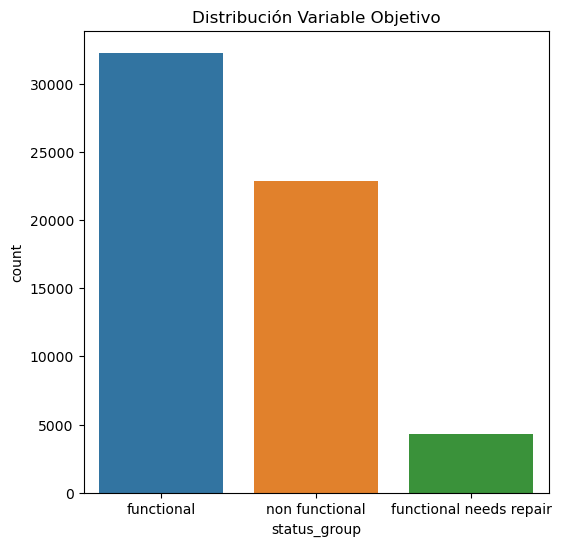

In [251]:
# Gráfico de la variable objetivo
fig, axs = plt.subplots(figsize=(6, 6))
g = sns.countplot(x='status_group',data=df)
axs.set_title('Distribución Variable Objetivo')
plt.show()

### Oversampling:

In [252]:
# Opcion A: Random Over Sampler
# Separate the features and target variable
X = df.drop('status_group', axis=1)
y = df['status_group']

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Fit and transform the data to oversample the minority class
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Check the class distribution of the resampled data
print(df_resampled['status_group'].value_counts())

functional                 32259
non functional             32259
functional needs repair    32259
Name: status_group, dtype: int64


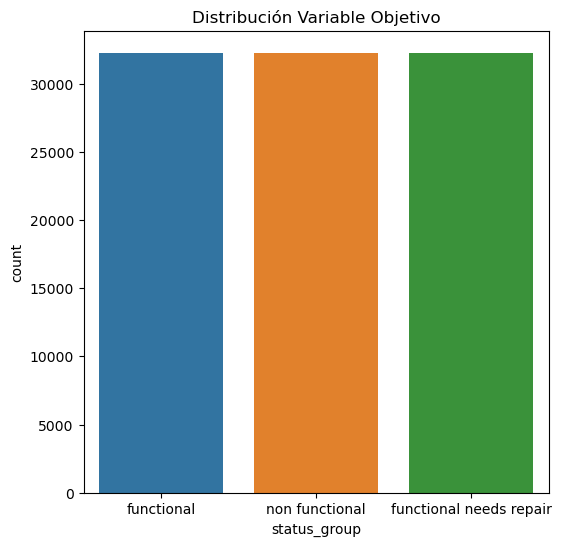

In [253]:
# Gráfico de la variable objetivo con oversampling
fig, axs = plt.subplots(figsize=(6, 6))
g = sns.countplot(x='status_group',data=df_resampled)
axs.set_title('Distribución Variable Objetivo')
plt.show()

In [254]:
# PARTICION TRAIN-TEST CON RANDOM-OVERSAMPLER
# Split the data into training and testing sets
train_df_res, test_df_res = train_test_split(df_resampled, test_size=0.2, random_state=42)

# Separate the features and target variables
X_train_res = train_df_res.drop('status_group', axis=1)
y_train_res = train_df_res['status_group']
X_test_res = test_df_res.drop('status_group', axis=1)
y_test_res = test_df_res['status_group']

In [255]:
# Compruebo el correcto muestreo resampleado
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test_res.shape)
print(y_test_res.shape)

(77421, 40)
(77421,)
(19356, 40)
(19356,)


In [257]:
# Opción B: SMOTE - Synthetic Minority Over-sampling Technique
# Resample the minority class
smote = SMOTE(sampling_strategy='minority', random_state=7)

# Separate the features and target variable
X = df.drop('status_group', axis=1)
y = df['status_group']

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled_smote = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Check the class distribution of the resampled dataset
print(y_resampled.value_counts())

In [259]:
# Gráfico de la variable objetivo con SMOTE
fig, axs = plt.subplots(figsize=(6, 6))
g = sns.countplot(x='status_group',data=df_resampled_smote)
axs.set_title('Distribución Variable Objetivo')
plt.show()

In [71]:
# Split the data into training and testing sets
train_df_res, test_df_res = train_test_split(df_resampled, test_size=0.2, random_state=42)

# Separate the features and target variables
X_train_res = train_df_res.drop('status_group', axis=1)
y_train_res = train_df_res['status_group']
X_test_res = test_df_res.drop('status_group', axis=1)
y_test_res = test_df_res['status_group']

In [72]:
# Compruebo el correcto muestreo resampleado
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test_res.shape)
print(y_test_res.shape)

(77421, 52)
(77421,)
(19356, 52)
(19356,)


### Prueba de modelos con oversampling

In [73]:
# MODELO 1: Regresión Logística
# ------------------------------------------------- #
# Instanciar el modelo
logreg = LogisticRegression(random_state=42, multi_class='multinomial')

# Entrenar el modelo
logreg.fit(X_train_res, y_train_res)

# Predecir para los datos de prueba
y_pred1_res = logreg.predict(X_test_res)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test_res, y_pred1_res)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.39202314527795


In [75]:
# MODELO 2: Naive Bayes
# ------------------------------------------------- #
nb = GaussianNB()

nb.fit(X_train_res, y_train_res)

y_pred2_res = nb.predict(X_test_res)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test_res, y_pred2_res)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.5644244678652615


In [80]:
# MODELO 3: Random Forest
# ------------------------------------------------- #
rfc = RandomForestClassifier(n_estimators=300, random_state=42, criterion='entropy', max_depth=20, max_features='auto')

rfc.fit(X_train_res, y_train_res)

y_pred3_res = rfc.predict(X_test_res)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test_res, y_pred3_res)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.8832403389129986


In [77]:
# MODELO 4: K-Nearest Neighbors (KNN)
# ------------------------------------------------- #
# create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)

# fit the model to the training data
knn.fit(X_train_res, y_train_res)

# make predictions on the test data
y_pred4_res = knn.predict(X_test_res)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test_res, y_pred4_res)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.7698904732382724


In [78]:
# MODELO 5: Gradient Boosting Classifier from sklearn
# ------------------------------------------------- #
# Define the Gradient Boosting Classifier model and fit it to the training data
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

gb_clf.fit(X_train_res, y_train_res)

# Make predictions on the testing data
y_pred5_res = gb_clf.predict(X_test_res)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test_res, y_pred5_res)

# Print accuracy score
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.7036061169663154


In [81]:
# MODELO 6: XGBoost
# ------------------------------------------------- #
xgb_model = xgb.XGBClassifier(learning_rate=0.5, max_depth=7, n_estimators=150)

# Train model on the training set
xgb_model.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred6_res = xgb_model.predict(X_test_res)

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test_res, y_pred6_res)

# Print accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8733209340772887


Si bien los modelos a priori parecieran dar mejores resultados con oversampling, el modelo que mayor resultado me dió fue sin tratar de balancear los datos.

### Undersampling

In [260]:
# Opcion A: Random Under Sampler
from imblearn.under_sampling import RandomUnderSampler
# Separate the features and target variable
X = df_encoded.drop('status_group', axis=1)
y = df_encoded['status_group']

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

# Check the class distribution of the resampled data
print(df_resampled['status_group'].value_counts())

0    4317
1    4317
2    4317
Name: status_group, dtype: int64


In [261]:
# PARTICION TRAIN-TEST CON RANDOM-UNDERSAMPLER
# Split the data into training and testing sets
train_df_res, test_df_res = train_test_split(df_resampled, test_size=0.2, random_state=42)

# Separate the features and target variables
X_train_res = train_df_res.drop('status_group', axis=1)
y_train_res = train_df_res['status_group']
X_test_res = test_df_res.drop('status_group', axis=1)
y_test_res = test_df_res['status_group']

In [262]:
print(X_train_res.shape)
print(y_train_res.shape)
print(X_test_res.shape)
print(y_test_res.shape)

(10360, 40)
(10360,)
(2591, 40)
(2591,)


Por el pequeño volumen de datos que nos queda después de hacer undersampling no parece ser la técnica más adecuada.

### Unifico el X_test

Creo una funcion que haga el preprocesado entero, para aplicarlo a un nuevo set de datos.

In [163]:
# Aplico los mismos pasos para x_test:

def preprocesado(data):
    
    # Cambio de tipo
    data['date_recorded'] = pd.to_datetime(data['date_recorded'])
    data['region_code'] = data['region_code'].astype('object')
    data['district_code'] = data['region_code'].astype('object')
    data['antiguedad_reg'] = data['date_recorded'].apply(lambda x: (fecha - x).days / 365.25)
    
    # Elimino variables
    cols_to_drop = ['date_recorded','amount_tsh','wpt_name','num_private','recorded_by','scheme_name','source_type','source_class','waterpoint_type_group','quantity_group','payment_type','water_quality','management_group','extraction_type_group','extraction_type_class','region','region_code','longitude','latitude','basin','lga']
    
    for col in cols_to_drop:
        data = data.drop([col], axis=1)
                      
    # Imputación de missings
    for var in na_cols:
        data[var] = data[var].fillna(data[var].mode().iloc[0])
                     
    data['construction_year'] = data['construction_year'].replace(0, year_median)
    
    # Index
    data = data.set_index('id')
    
    # Crear dummies
    # iterate over each column in the dataframe
    for col in data.columns:

        # check if the column is categorical and has less than 10 unique values
        if data[col].dtype == 'object' and len(data[col].unique()) < 10:
    
            # create dummy variables for the column and add them to the dataframe
            dummy_data = pd.get_dummies(data[col], prefix=col)
            data = pd.concat([data, dummy_data], axis=1)
            
            # drop the original column from the dataframe
            data = data.drop(col, axis=1)
    
    for col in binary:
        data[col] = data[col].astype(int)
    
    # tramificacion variables
    data['funder'] = data['funder'].replace(categories_to_group, 'otros')
    data['installer'] = data['installer'].replace(categories_to_group, 'otros')
    data['subvillage'] = data['subvillage'].replace(categories_to_group, 'otros')
    
    le = LabelEncoder()
    cat_vars = data.select_dtypes(include='object')
    for col in cat_vars:
        data[col] = le.fit_transform(data[col])

    return data

In [164]:
# Aplico el preprocesado a los datos de test
X_test_new = preprocesado(x_test0)

In [165]:
# Divido en train y test. No utilizaré el df con el oversampling porque obtuve peores resultados
X_train = df.drop('status_group',axis=1)
y_train = df['status_group']

In [166]:
print(X_train.shape)
print(y_train.shape)
print(X_test_new.shape)

(59400, 40)
(59400,)
(14850, 40)


In [68]:
# X_train = df_resampled.drop('status_group',axis=1)
# y_train = df_resampled['status_group']

## Modelos Finales

#### Random Forest Classifier

In [167]:
# MODELO RF CON MEJORES HIPERPARAMETROS
rfc = RandomForestClassifier(n_estimators=300, random_state=42, criterion='entropy', max_depth=20, max_features='auto')

rfc.fit(X_train, y_train)

y_pred_new = rfc.predict(X_test_new)

In [168]:
# Get the feature importances and names
importances = rfc.feature_importances_
feature_names = X_train.columns

# Create a list of (importance, feature name) tuples
feature_importances = [(importance, feature) for importance, feature in zip(importances, feature_names)]

# Sort the feature importances by importance in descending order
feature_importances = sorted(feature_importances, reverse=True)

# Print the feature importances
for importance, feature in feature_importances:
    print(f"{feature}: {importance}")

quantity_dry: 0.09241672735552321
antiguedad_reg: 0.08820997005260199
gps_height: 0.08728268066902709
ward: 0.06633362181053905
construction_year: 0.06488676403825175
population: 0.05835494082722769
funder: 0.05412515004187867
installer: 0.05106907882364673
extraction_type: 0.045352896520302784
district_code: 0.04362406019718896
waterpoint_type_other: 0.04038907195133932
subvillage: 0.035044403661578793
source: 0.03357066239101065
quantity_enough: 0.02737357009416579
management: 0.024469199154664285
scheme_management: 0.022391036170533053
payment_never pay: 0.017247911835095837
quantity_insufficient: 0.01580793739157715
permit: 0.013761831147296875
waterpoint_type_communal standpipe: 0.01350814583930261
waterpoint_type_hand pump: 0.012518749843229916
waterpoint_type_communal standpipe multiple: 0.011132577233567847
payment_pay per bucket: 0.009498194073233586
payment_unknown: 0.008827204065175488
payment_pay monthly: 0.008770593766965946
public_meeting: 0.008594029454590797
quantity_se

In [169]:
# EXPORTACIÓN DEL ARCHIVO PARA SUBIR MODELO RANDOM FOREST

# agrego la variable objetivo al final de la matriz X
X_test_new['status_group'] = y_pred_new

# creo una variable donde guardaré los resultados a subir
submission_rf = pd.DataFrame(X_test_new['status_group'])

# reemplazo los valores numericos por el texto que representan
submission_rf['status_group'] = submission_rf['status_group'].replace({0: 'functional', 1: 'functional needs repair', 2: 'non functional'})

# guardo en el csv final
submission_rf.to_csv('sub_rf_13_04_final.csv',index=True)

**Mejor Resultado obtenido: 0.8082 ✅**

#### XGBoost:

In [92]:
# Como agregué la target para subir el archivo con el anterior modelo la quito para el nuevo modelo
X_test_new = X_test_new.drop('status_group',axis=1)

In [93]:
# MODELO XGB CON MEJORES HIPERPARAMETROS
import xgboost as xgb

xgb_model = xgb.XGBClassifier(learning_rate=0.5, max_depth=7, n_estimators=150)

# Train model on the training set
xgb_model.fit(X_train, y_train)

y_pred_new = xgb_model.predict(X_test_new)

In [94]:
# EXPORTACIÓN DEL ARCHIVO PARA SER SUBIDO

# agrego la variable objetivo al final de la matriz X
X_test_new['status_group'] = y_pred_new

# creo una variable donde guardaré los resultados a subir
submission_xgb = pd.DataFrame(X_test_new['status_group'])

# reemplazo los valores numericos por el texto que representan
submission_xgb['status_group'] = submission_xgb['status_group'].replace({0: 'functional', 1: 'functional needs repair', 2: 'non functional'})

# guardo en el csv final
submission_xgb.to_csv('sub_xgb_13_04_final2.csv',index=True)

**Resultado obtenido: 0.7766**

###  ⬆️ SUBMISSIONS:

Dejo las subidas de las distintas pruebas de modelos que fui realizando y sus resultados:

Primeros modelos:

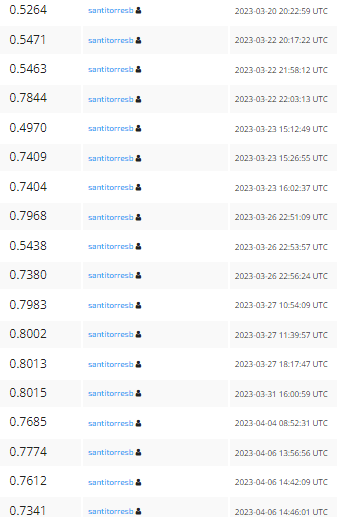

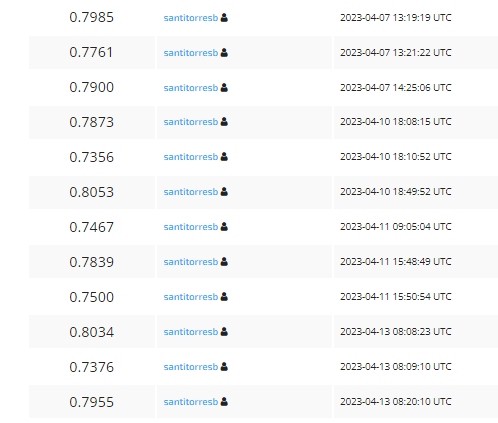

Prueba con distintas técnicas de feature engineering:
- oversampling y undersampling
- eliminación de variables con cierta colinealidad
- creación de variables nuevas como décadas en vez de año de construcción
- tramificación de variables como *population* y *gps_height*

que no dieron mejores resultados. 

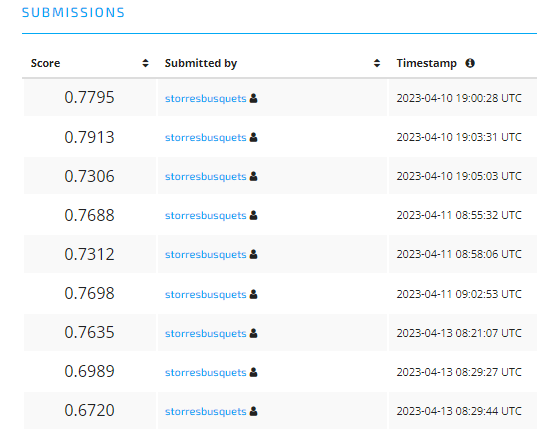

**Pruebas de mejores modelos:**

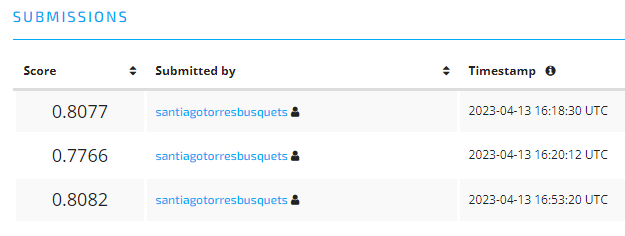

Dejo subidos a mi Github el resto de pruebas y versiones:
https://github.com/Tochers/UCM-Projects/tree/main/MachineLearning